In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gdp
import seaborn as sb
import plotly.graph_objects as go

# Now that the PCA+Kmeans Results is ready to go, load the dataset

In [31]:
d1 = pd.read_csv("PCA+Kmeans Results.csv")
d1

,Region,vs Tower,vs Population,vs Urbanization,vs Wage,vs Surface Area
0,ARMM,Slow,Slow,Slow,Slow,Slow
1,CAR,Slow,Slow,Slow,Slow,Slow
2,NCR,Fast,Fast,Fast,Fast,Fast
3,Region I,Decent,Decent,Decent,Decent,Decent
4,Region II,Decent,Decent,Decent,Decent,Decent
5,Region III,Good,Good,Good,Good,Good
6,Region IV-A,Good,Good,Good,Good,Good
7,Region IV-B,Decent,Decent,Decent,Decent,Decent
8,Region IX,Decent,Decent,Decent,Decent,Decent
9,Region V,Slow,Slow,Decent,Slow,Slow


# Load the .shp file that contains coordinates for geometric location and attribute features of the Philippines from Philippines - Subnational Administrative Boundaries. 
We are going to use the Philippines’ shape file on Regional level; it will be used to merge with PCA+Kmeans Results dataset with GEOdatframe.

In [5]:
#Philippines administrative level: Region 
fp = "phl_admbnda_adm1_psa_namria_20200529.shp"
region_df = gdp.read_file(fp)
region_df

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,53.623497,1.050272,Autonomous Region in Muslim Mindanao,PH150000000,None,ARMM,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((119.46876 4.59360, 119.46881 4..."
1,8.027454,1.546712,Cordillera Administrative Region,PH140000000,None,CAR,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((121.22208 18.50058, 121.22086 18.483..."
2,2.320234,0.050216,National Capital Region,PH130000000,None,NCR,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((121.03842 14.78525, 121.03876 14.785..."
3,14.995101,1.043983,Region I,PH010000000,None,Ilocos Region,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((119.86596 15.81539, 119.86597 ..."
4,19.139048,2.241812,Region II,PH020000000,None,Cagayan Valley,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((122.46667 16.92135, 122.46674 ..."
5,15.949563,1.793513,Region III,PH030000000,None,Central Luzon,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((120.11687 14.76309, 120.11689 ..."
6,27.624115,1.326710,Region IV-A,PH040000000,None,Calabarzon,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((122.72165 13.36485, 122.72181 ..."
7,78.804542,2.220374,Region IV-B,PH170000000,None,Mimaropa,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((117.31260 7.50671, 117.31249 7..."
8,23.181441,1.196677,Region IX,PH090000000,None,Zamboanga Peninsula,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((121.88379 6.69138, 121.88380 6..."
9,44.923243,1.446324,Region V,PH050000000,None,Bicol Region,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((122.98823 11.73079, 122.98824 ..."


Let’s preview our map with no data in it

<AxesSubplot:>

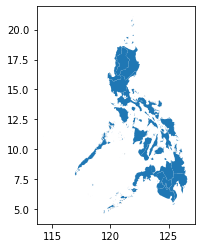

In [4]:
region_df.plot()

Rename columns and row of the uploaded PCA+Kmeans Results file to align the region to spatial data. These are ARMM, CAR and NCR. Moreover, the Region column header should also be renamed to ADM1_EN

In [11]:
d1['Region'].replace(['ARMM'], 'Autonomous Region in Muslim Mindanao', inplace=True)
d1['Region'].replace(['CAR'], 'Cordillera Administrative Region', inplace=True)
d1['Region'].replace(['NCR'], 'National Capital Region', inplace=True)
d2 = d1.rename(columns = {'Region':'ADM1_EN'}, inplace = False)
d2

,ADM1_EN,vs Tower,vs Population,vs Urbanization,vs Wage,vs Surface Area
0,Autonomous Region in Muslim Mindanao,Slow,Slow,Slow,Slow,Slow
1,Cordillera Administrative Region,Slow,Slow,Slow,Slow,Slow
2,National Capital Region,Fast,Fast,Fast,Fast,Fast
3,Region I,Decent,Decent,Decent,Decent,Decent
4,Region II,Decent,Decent,Decent,Decent,Decent
5,Region III,Good,Good,Good,Good,Good
6,Region IV-A,Good,Good,Good,Good,Good
7,Region IV-B,Decent,Decent,Decent,Decent,Decent
8,Region IX,Decent,Decent,Decent,Decent,Decent
9,Region V,Slow,Slow,Decent,Slow,Slow


# Now we need to merge our geodata with our results dataset using pd.join()
Datasets are merged  considering 'ADM1_EN' as key.

In [17]:
# join the geodataframe with the PCA+Kmeans Results dataframe
merged = region_df.set_index("ADM1_EN").join(d2.set_index("ADM1_EN"))
merged.head()                                 

,Shape_Leng,Shape_Area,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,vs Tower,vs Population,vs Urbanization,vs Wage,vs Surface Area
ADM1_EN,,,,,,,,,,,,,,,,,
Autonomous Region in Muslim Mindanao,53.623497,1.050272,PH150000000,None,ARMM,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((119.46876 4.59360, 119.46881 4...",Slow,Slow,Slow,Slow,Slow
Cordillera Administrative Region,8.027454,1.546712,PH140000000,None,CAR,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((121.22208 18.50058, 121.22086 18.483...",Slow,Slow,Slow,Slow,Slow
National Capital Region,2.320234,0.050216,PH130000000,None,NCR,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((121.03842 14.78525, 121.03876 14.785...",Fast,Fast,Fast,Fast,Fast
Region I,14.995101,1.043983,PH010000000,None,Ilocos Region,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((119.86596 15.81539, 119.86597 ...",Decent,Decent,Decent,Decent,Decent
Region II,19.139048,2.241812,PH020000000,None,Cagayan Valley,None,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((122.46667 16.92135, 122.46674 ...",Decent,Decent,Decent,Decent,Decent


# Map time!

# To start mapping. Using Matplotlib, we set set a variable to map and set the range. We use Choropleth Maps, it is a type of thematic map in which a set of pre-defined areas is colored or patterned in proportion to represent spatial variations.

We will use the same approach for all the attributes: Tower, Population, Urbanization, Wage and Surface Area

In [18]:
# set a variable that will call whatever column we want to visualise on the map for Tower
variable = "vs Tower"

# We create the figure for the map to be drawn in.

We also customize our map by removing the axis, setting the color to Spectral and adding title to our map.

# Internet Speed and Towers

(113.66153858585, 127.22131926315006, 3.760564947900074, 21.948615028100072)

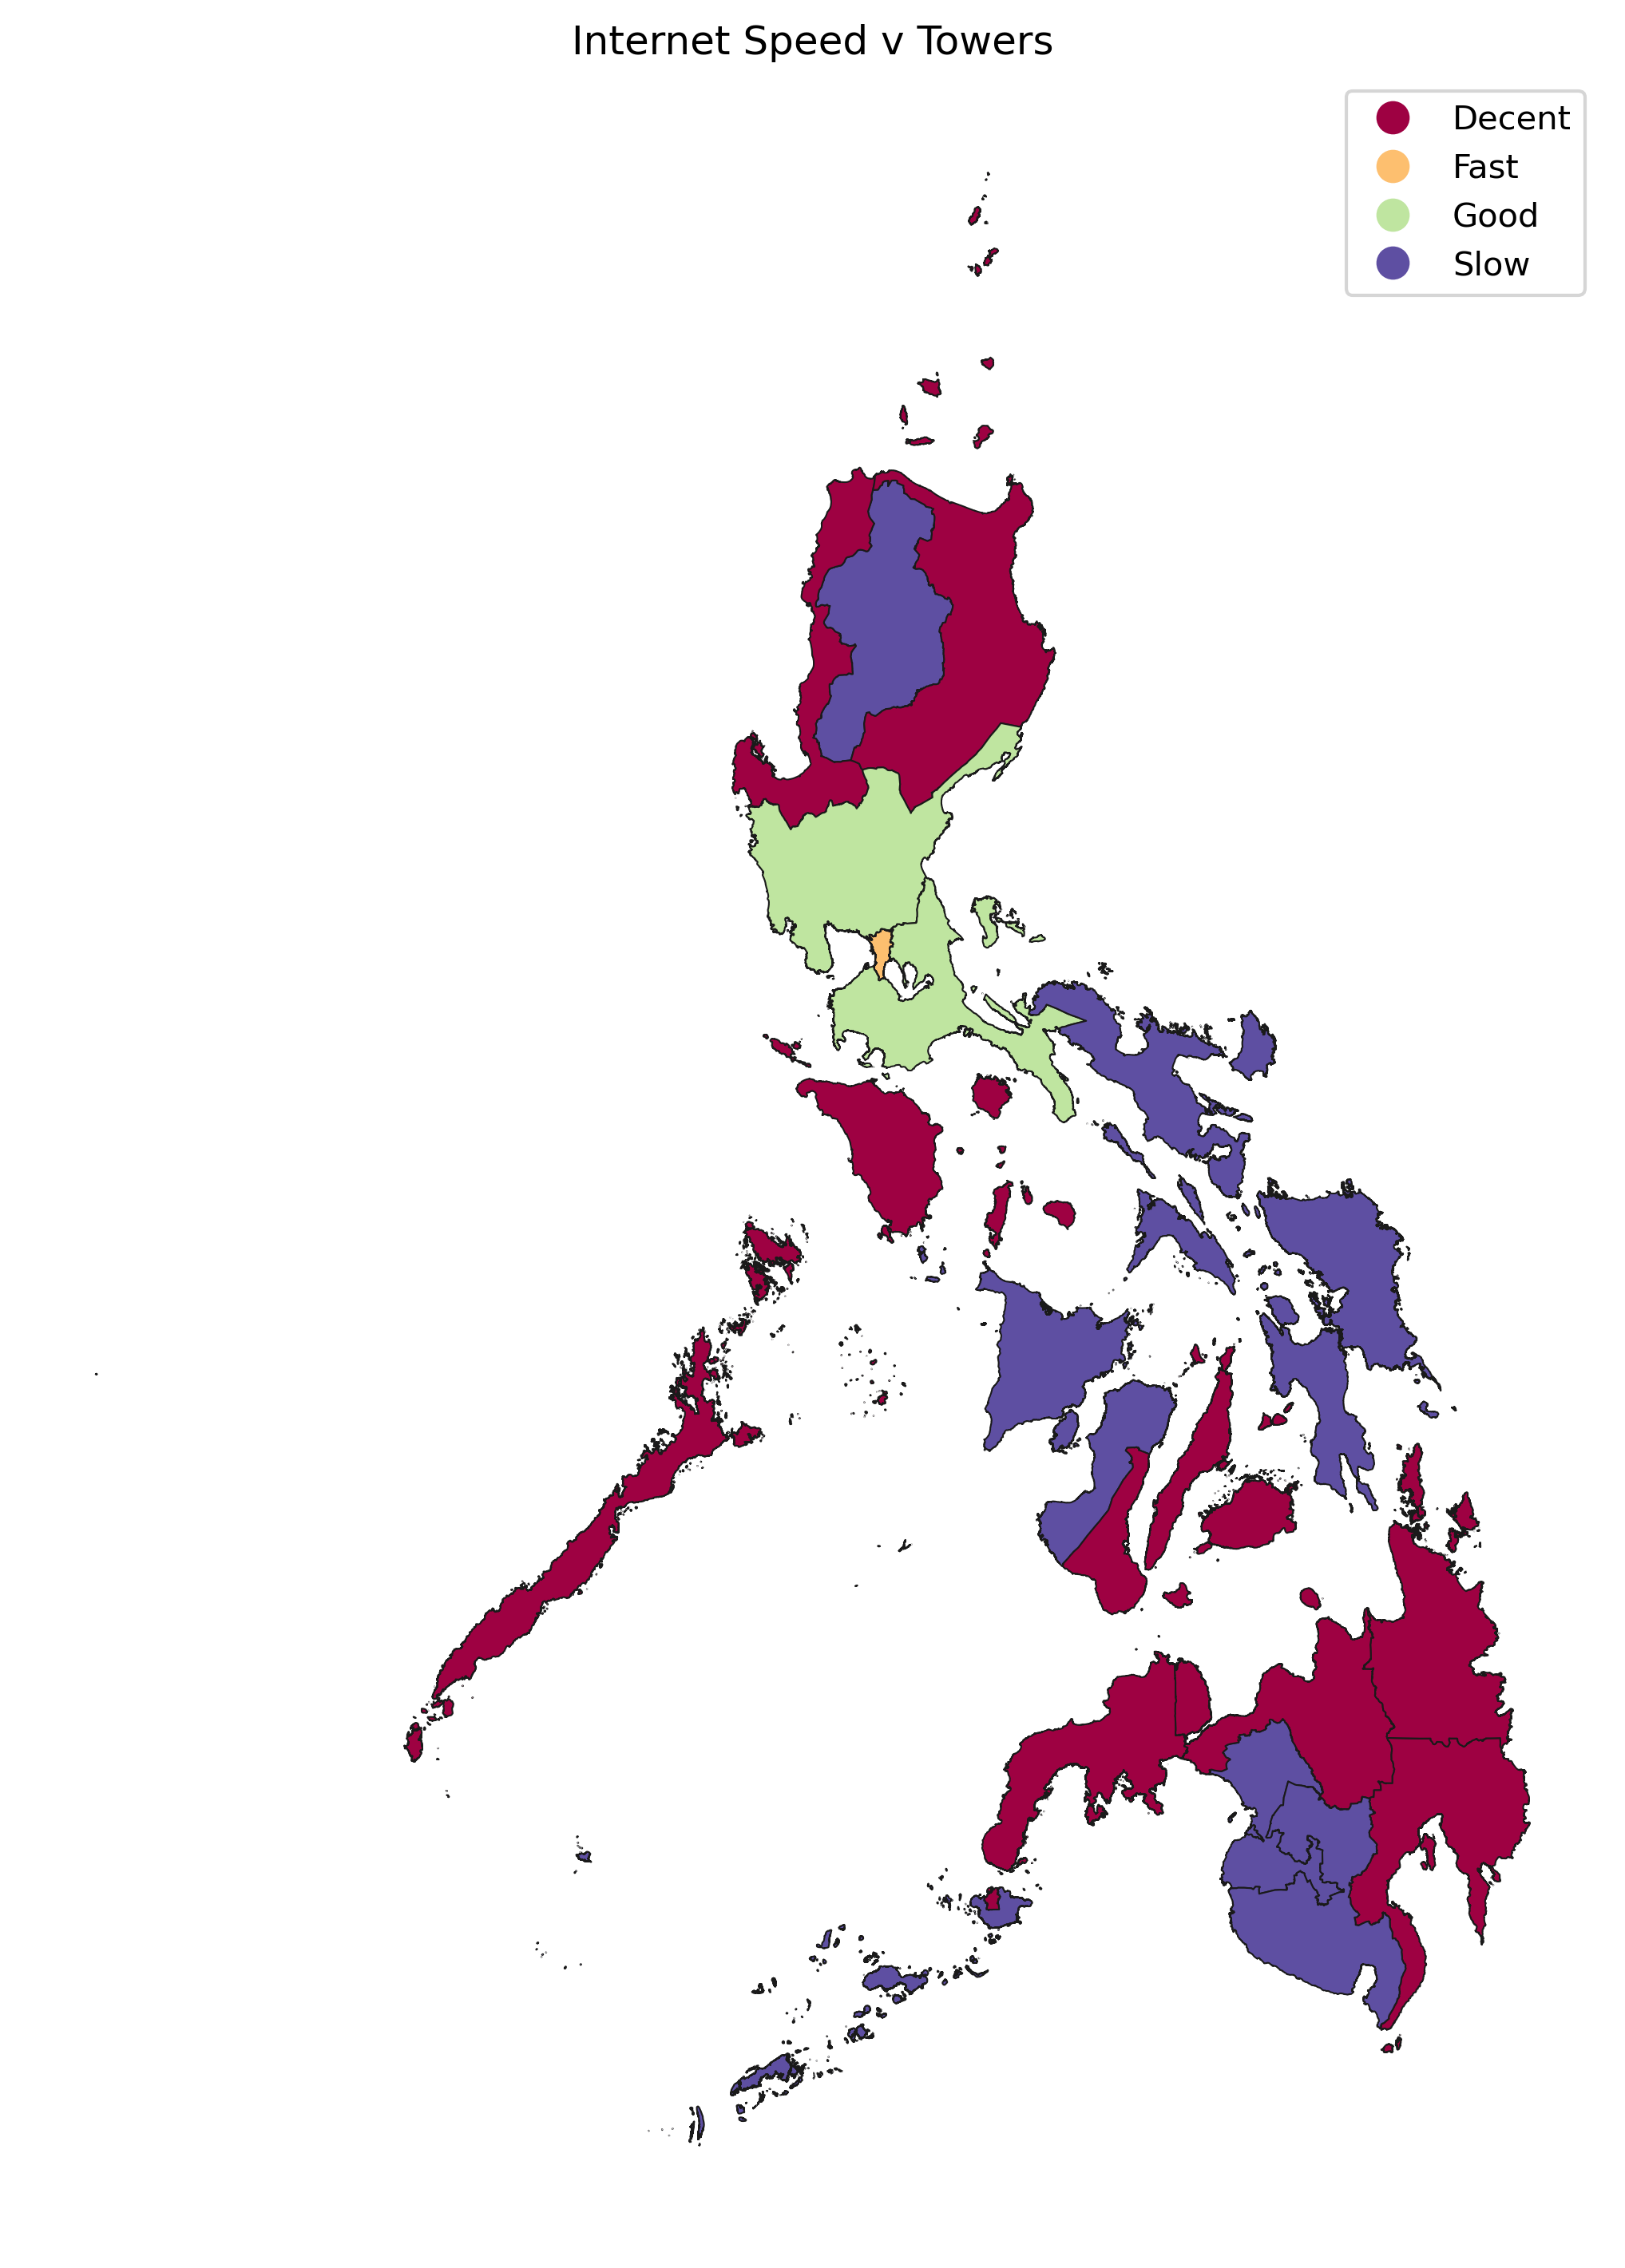

In [19]:
# create figure and axes for Matplotlib and resolution with dpi
fx, ax= plt.subplots(1, figsize=(20, 12),sharex=True, sharey=True, dpi=300)

# create map
merged.plot(column=variable, cmap="Spectral", linewidth=0.5, ax=ax, edgecolor="0.10",legend=True)

#add the title
plt.title('Internet Speed v Towers')

#remove the axis
ax.axis("off")

Unsurprisingly, the Metro Manila (NCR) has the fastest internet, as it has the largest concentration of cell sites. Meanwhile, it is evident that other regions are lagging behind in terms of internet speed and probably in number of cell towers. The map shows the inequality of internet access and digital infrastructure. 

# Internet Speed and Population

In [23]:
# set a variable that will call whatever column we want to visualise on the map for Population
variable = "vs Population"

(113.66153858585, 127.22131926315006, 3.760564947900074, 21.948615028100072)

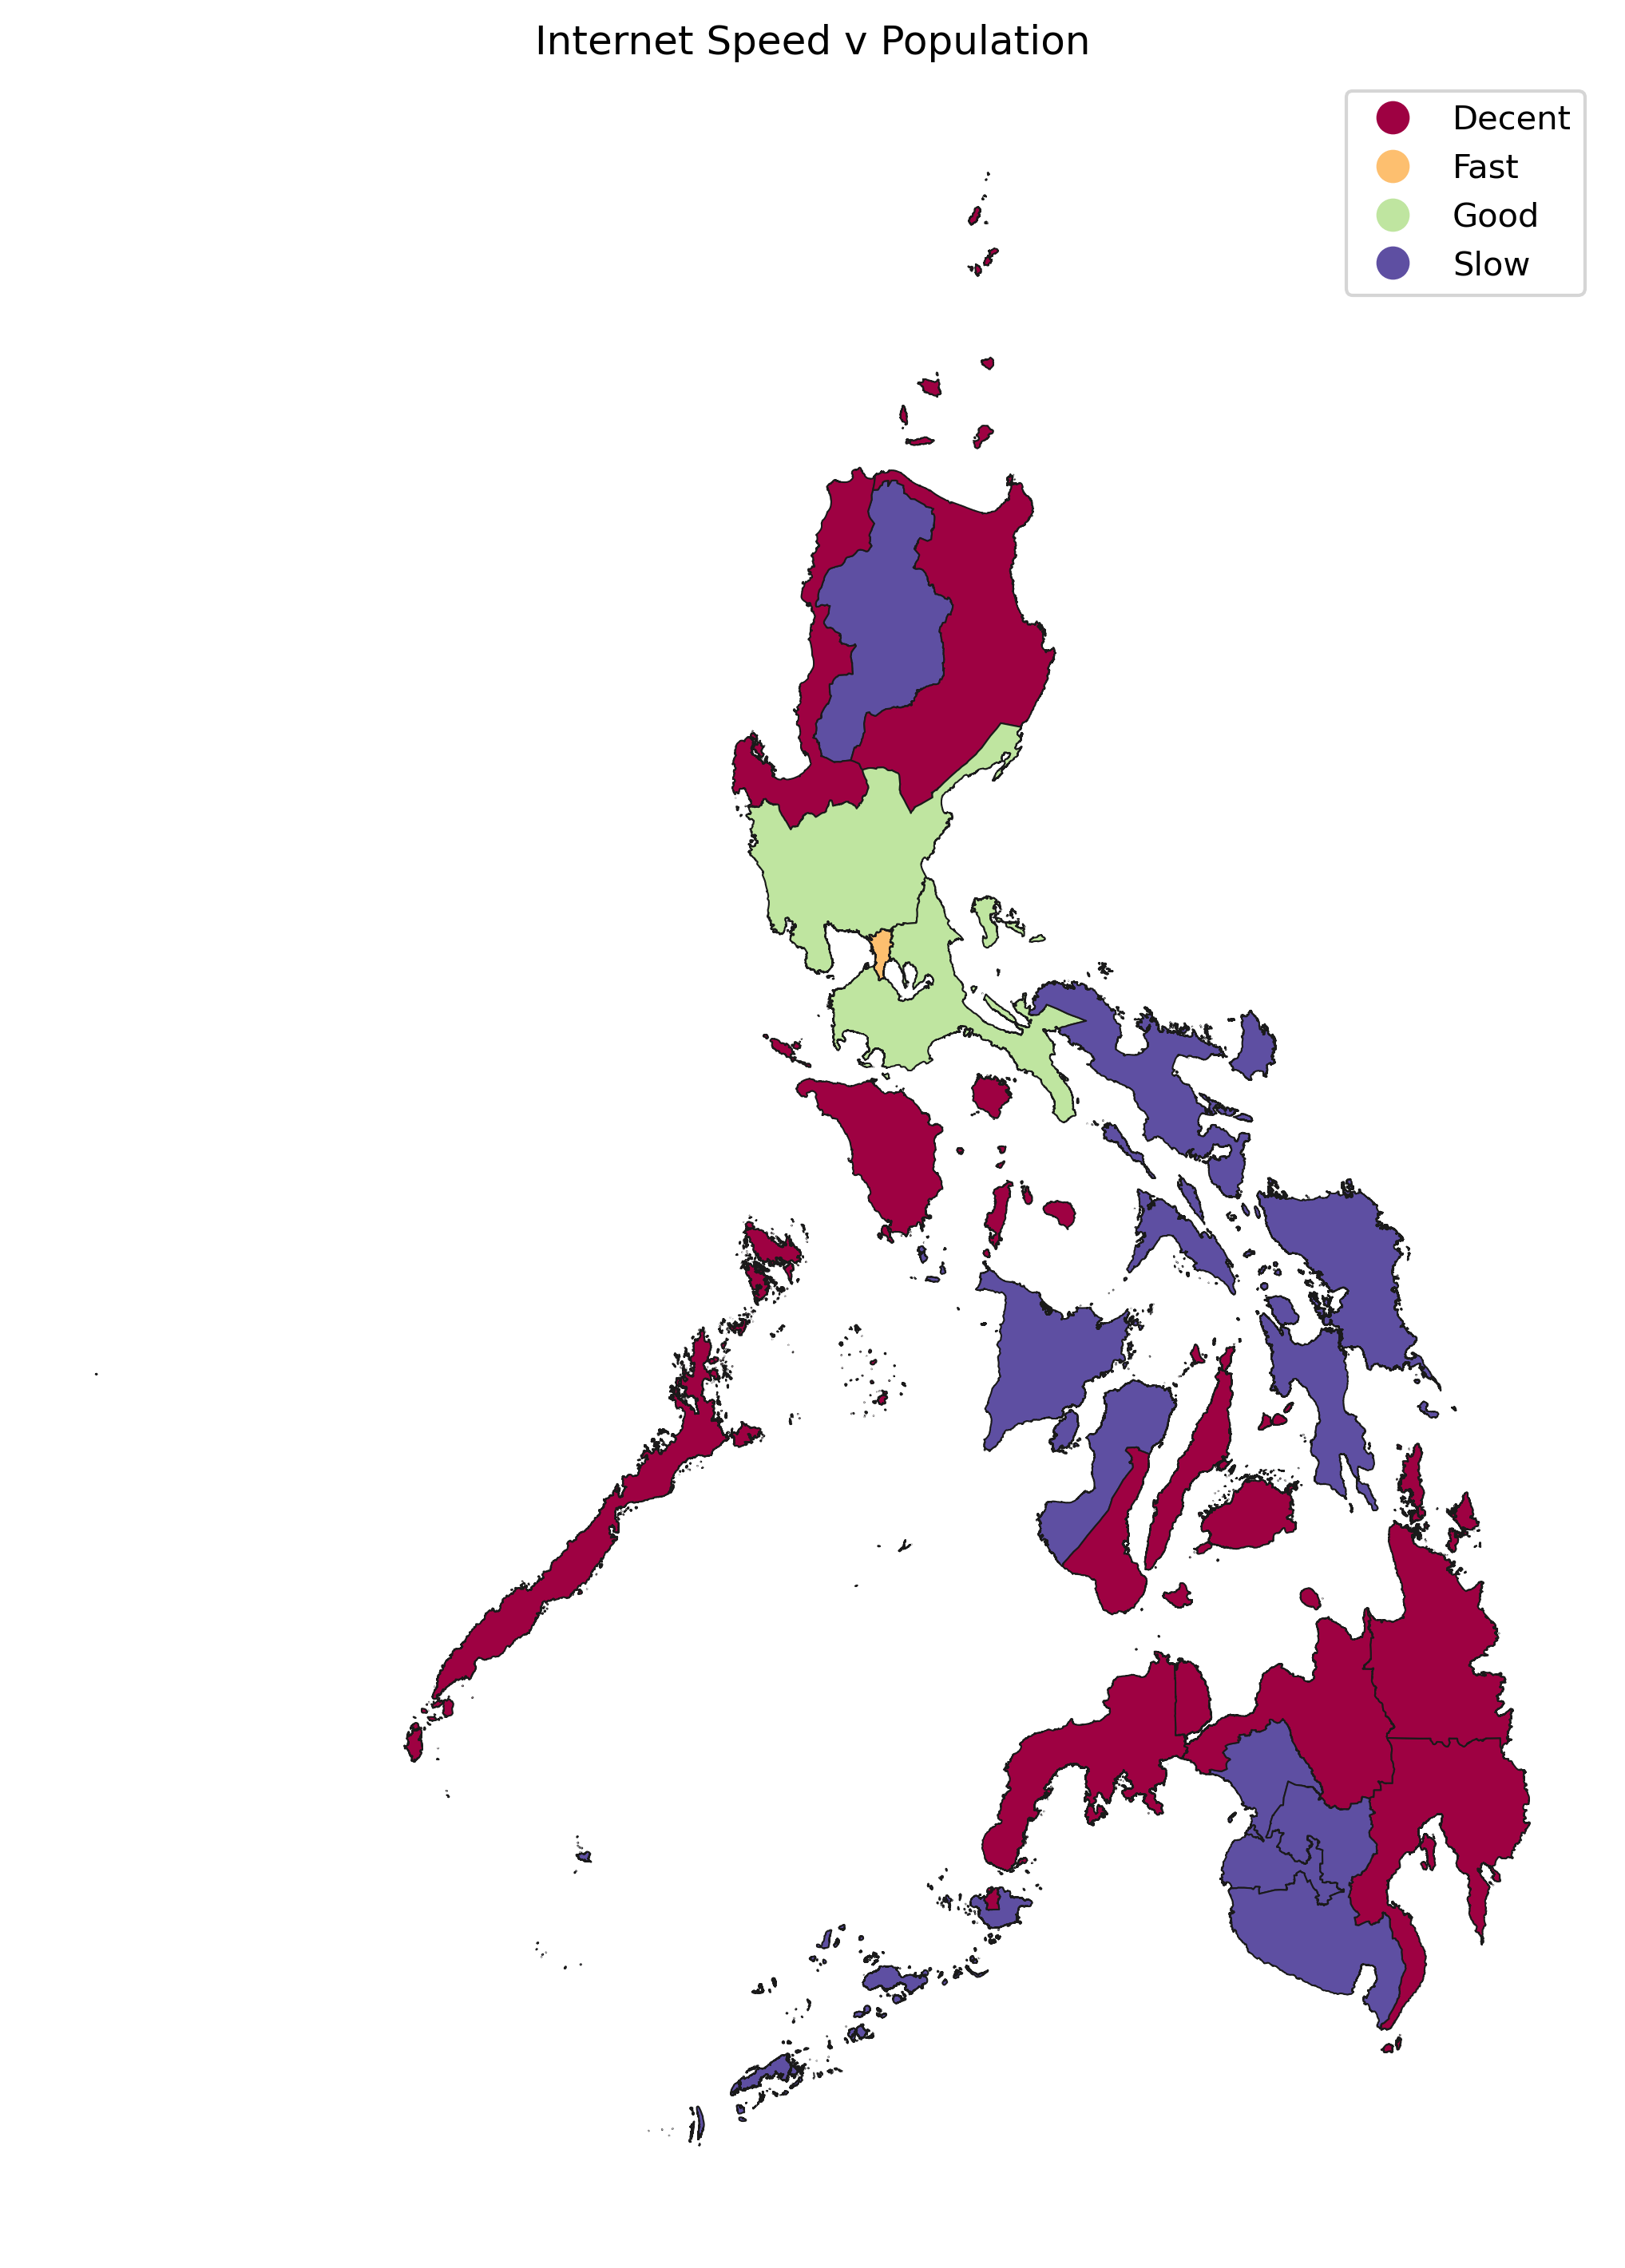

In [24]:
# create figure and axes for Matplotlib and resolution with dpi
fx, ax= plt.subplots(1, figsize=(20, 12),sharex=True, sharey=True, dpi=300)

# create map
merged.plot(column=variable, cmap="Spectral", linewidth=0.5, ax=ax, edgecolor="0.10",legend=True)

#add the title
plt.title('Internet Speed v Population')

#remove the axis
ax.axis("off")

Slow internet is evident in the map. This is due to many people are availing the internet services using data-heavy activities in specific area at the same time.  It means that the Internet connection can become sluggish. 

# Internet Speed and Urbanization

In [25]:
# set a variable that will call whatever column we want to visualise on the map
variable = "vs Urbanization"

(113.66153858585, 127.22131926315006, 3.760564947900074, 21.948615028100072)

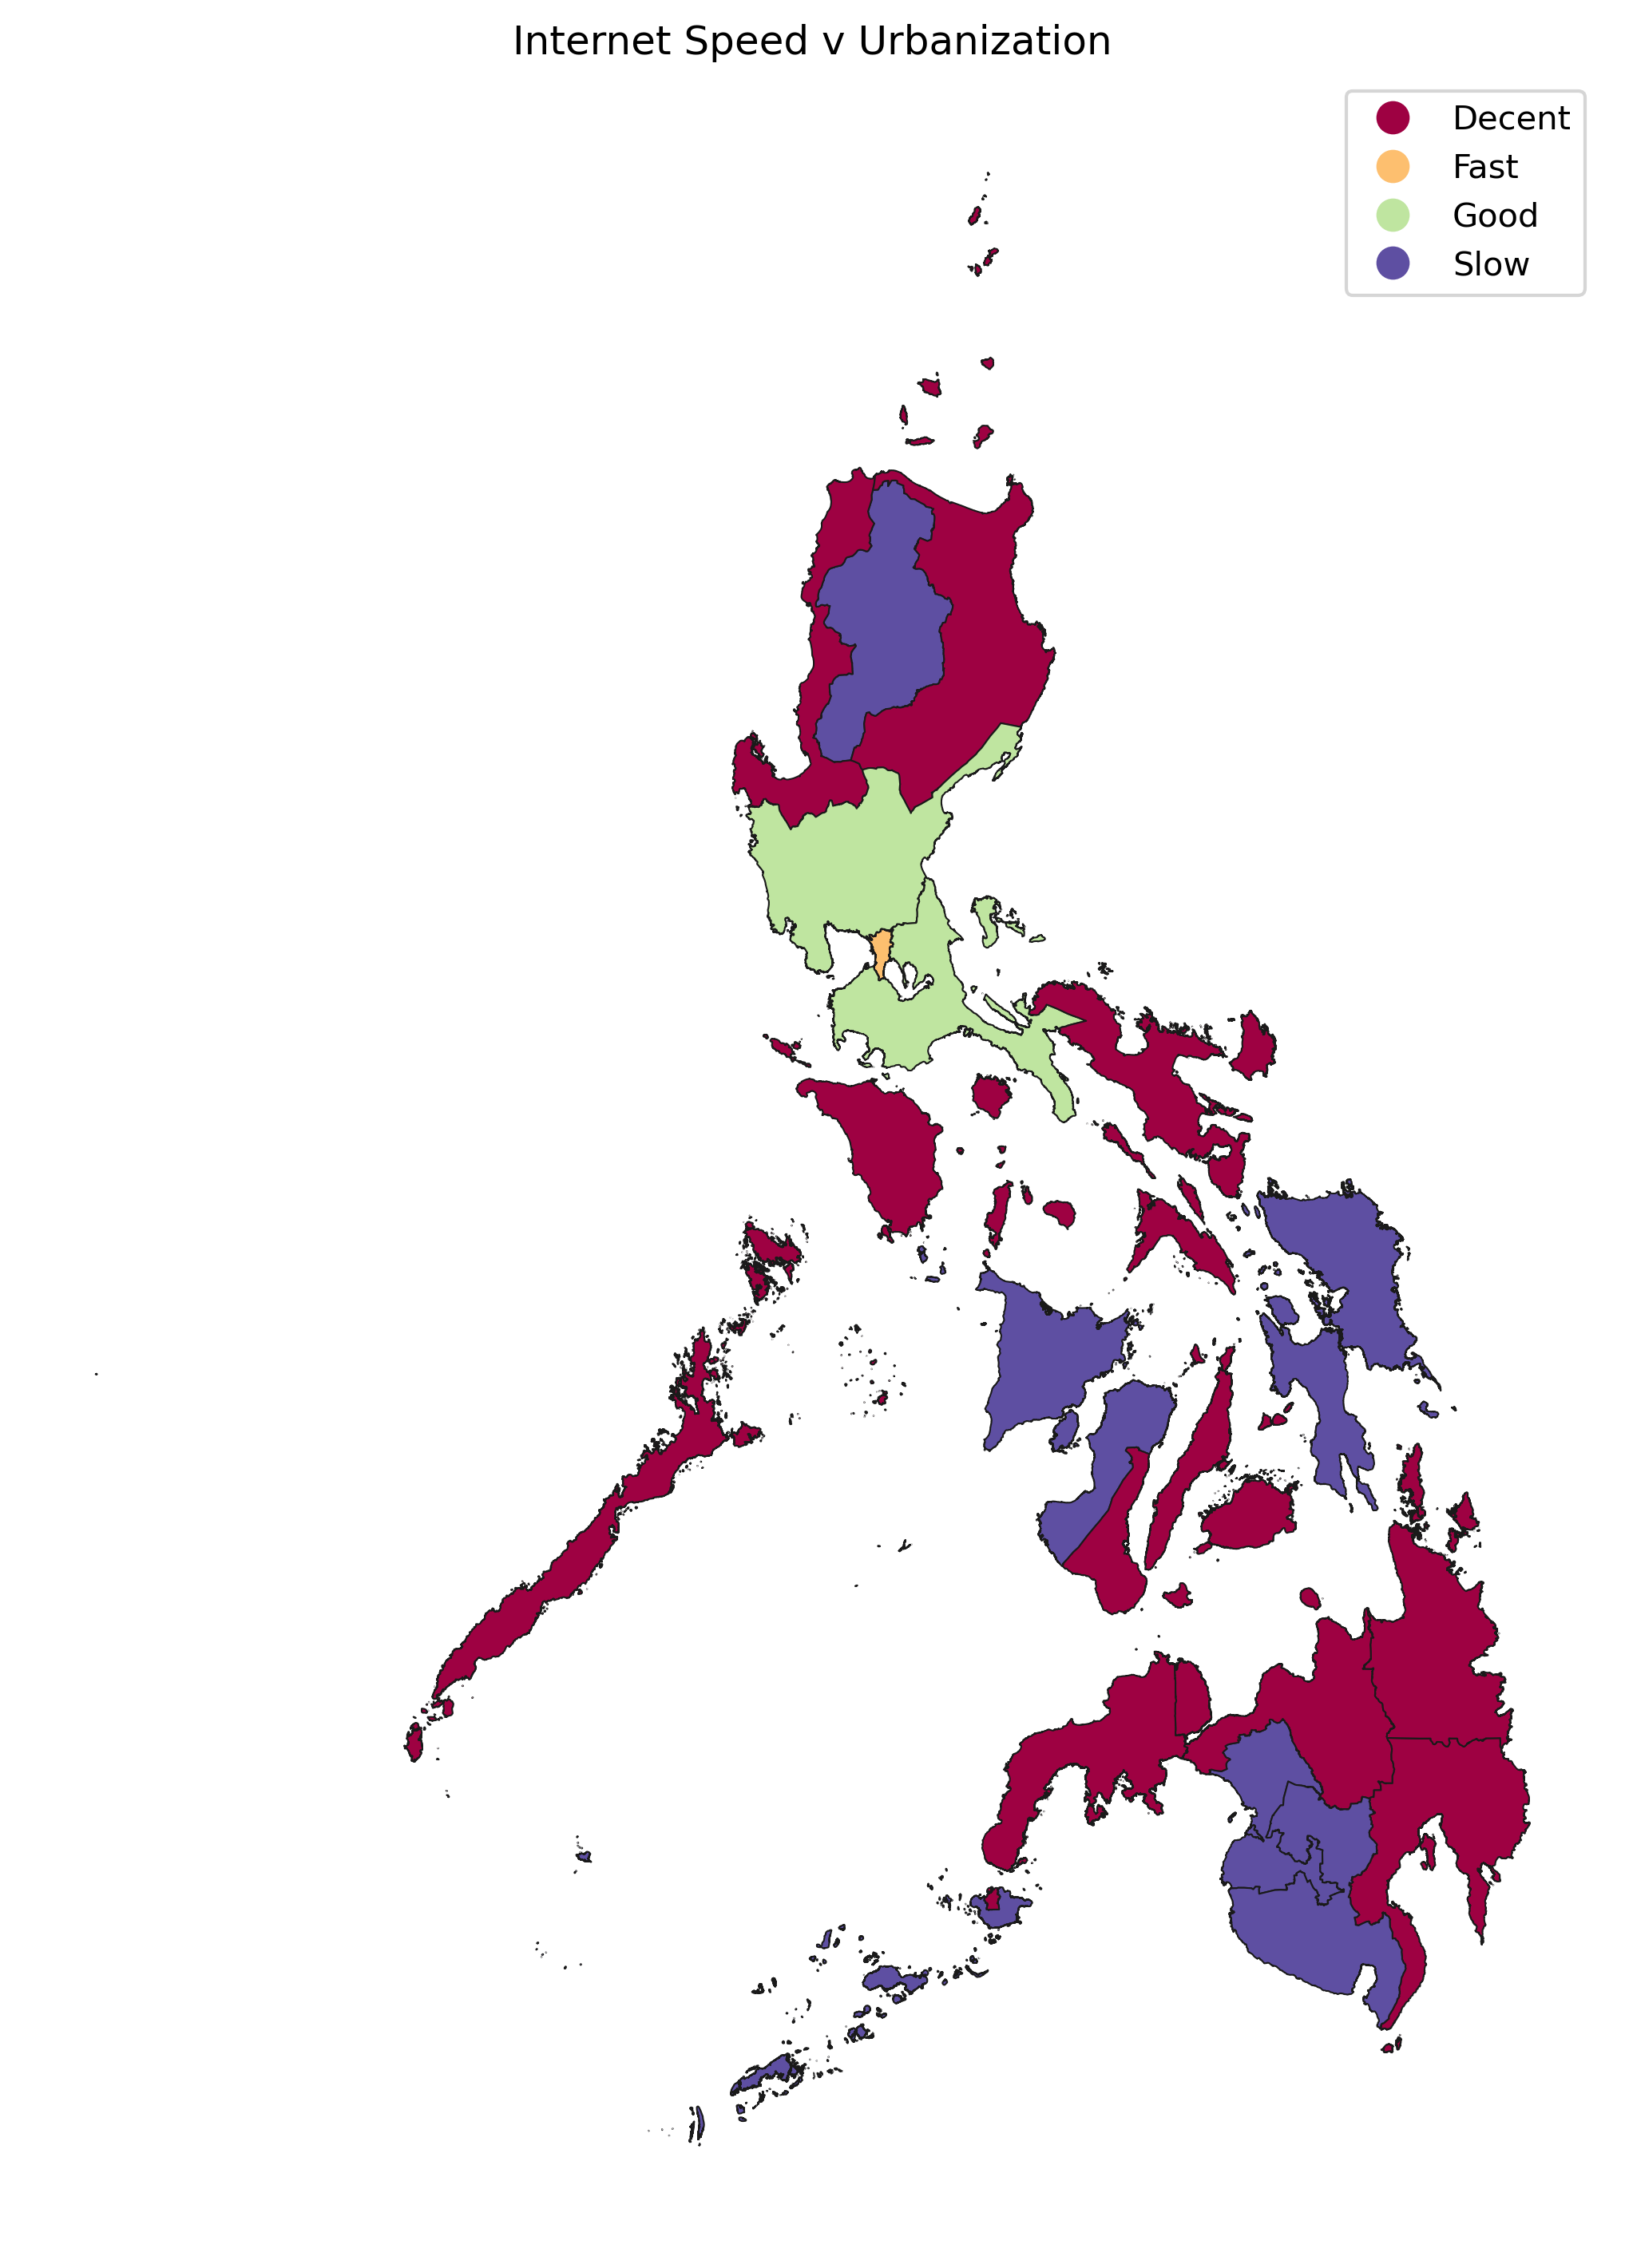

In [26]:
# create figure and axes for Matplotlib and resolution  with dpi
fx, ax= plt.subplots(1, figsize=(20, 12),sharex=True, sharey=True, dpi=300)

# create map
merged.plot(column=variable, cmap="Spectral", linewidth=0.5, ax=ax, edgecolor="0.10",legend=True)

#add the title
plt.title('Internet Speed v Urbanization')

#remove the axis
ax.axis("off")

 NCR still outshines the other regions with the fastest internet speed and highest level of urbanization. The level of urbanization clearly affects the speed per region, showing that regions 3 and 4A, regions with high level of urbanization show faster internet speeds as compared to regions that are considered rural. The number of regions per cluster are unaffected.

# Internet Speed and Wage

In [27]:
# set a variable that will call whatever column we want to visualise on the map
variable = "vs Wage"

(113.66153858585, 127.22131926315006, 3.760564947900074, 21.948615028100072)

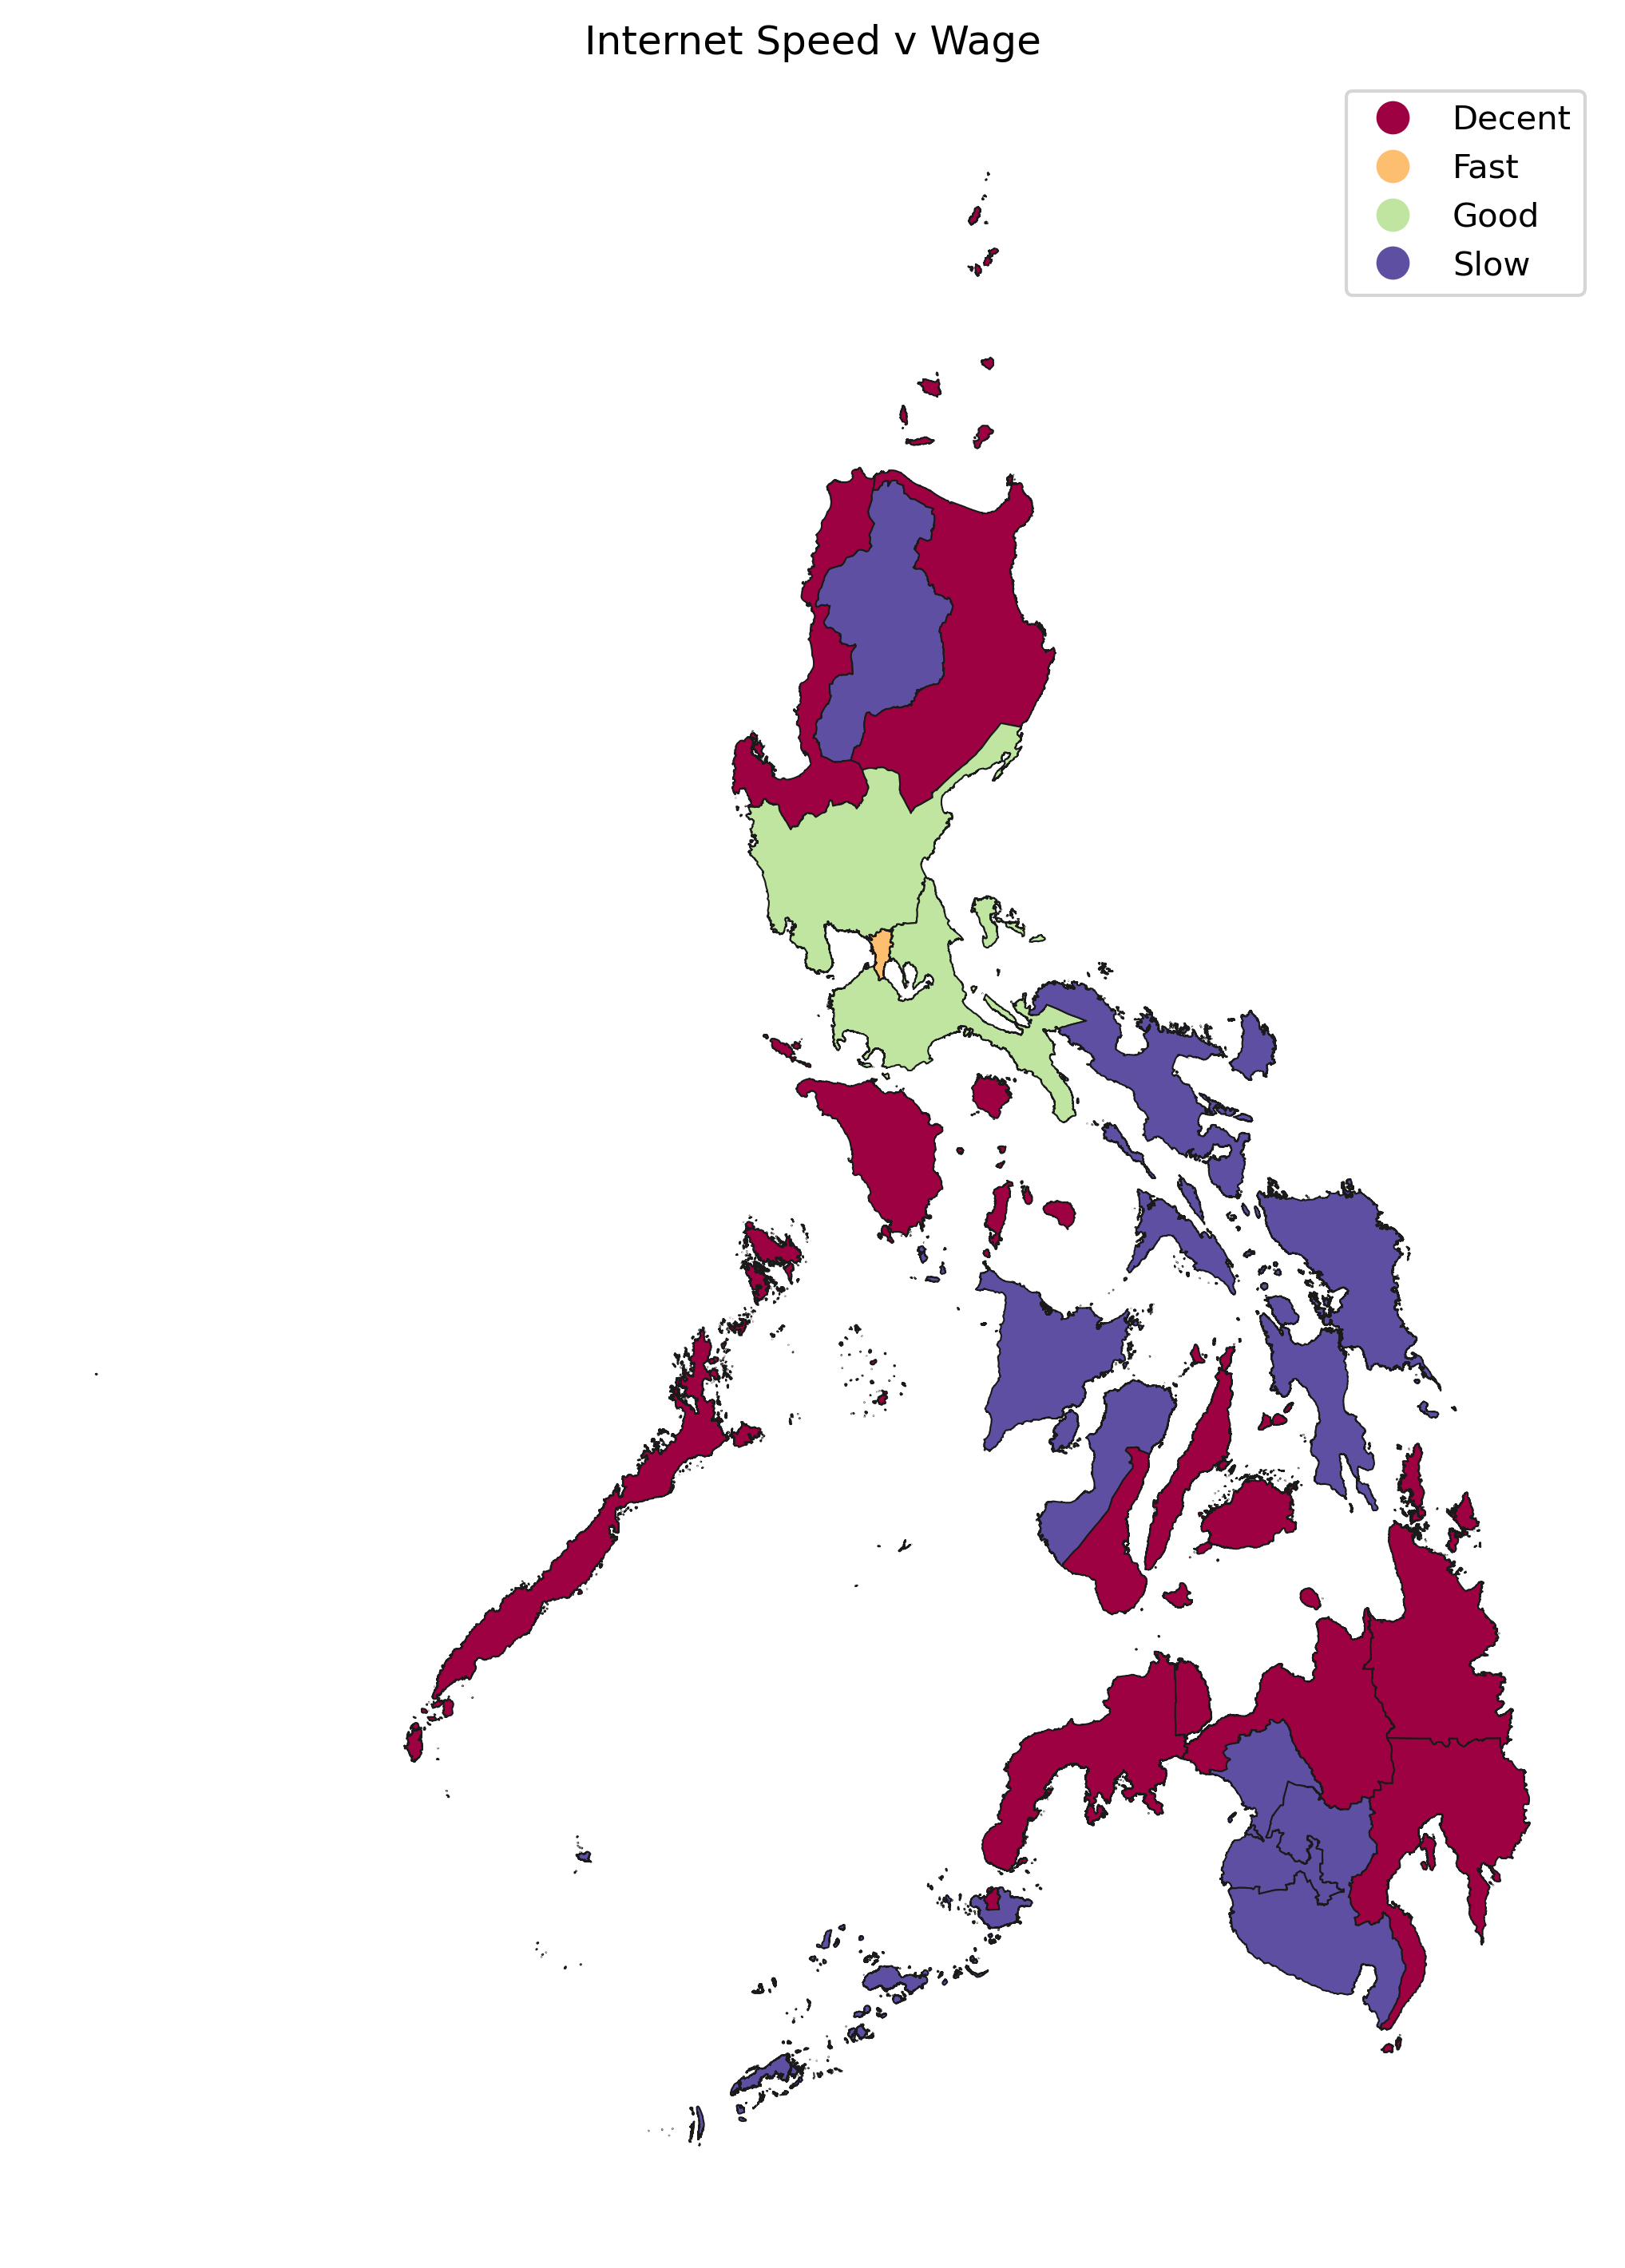

In [28]:
# create figure and axes for Matplotlib
fx, ax= plt.subplots(1, figsize=(20, 12),sharex=True, sharey=True, dpi=300)

# create map
merged.plot(column=variable, cmap="Spectral", linewidth=0.5, ax=ax, edgecolor="0.10",legend=True)

#add the title
plt.title('Internet Speed v Wage')

#remove the axis
ax.axis("off")

Again, the Metro Manila (NCR) is the outlier here. This shows that the minimum wage is not affecting the speed of internet. However, when it comes to accessing services for internet and technologies, we can see some changes for this as we focus on purchasing power. 

In [21]:
# set a variable that will call whatever column we want to visualise on the map
variable = "vs Surface Area"

(113.66153858585, 127.22131926315006, 3.760564947900074, 21.948615028100072)

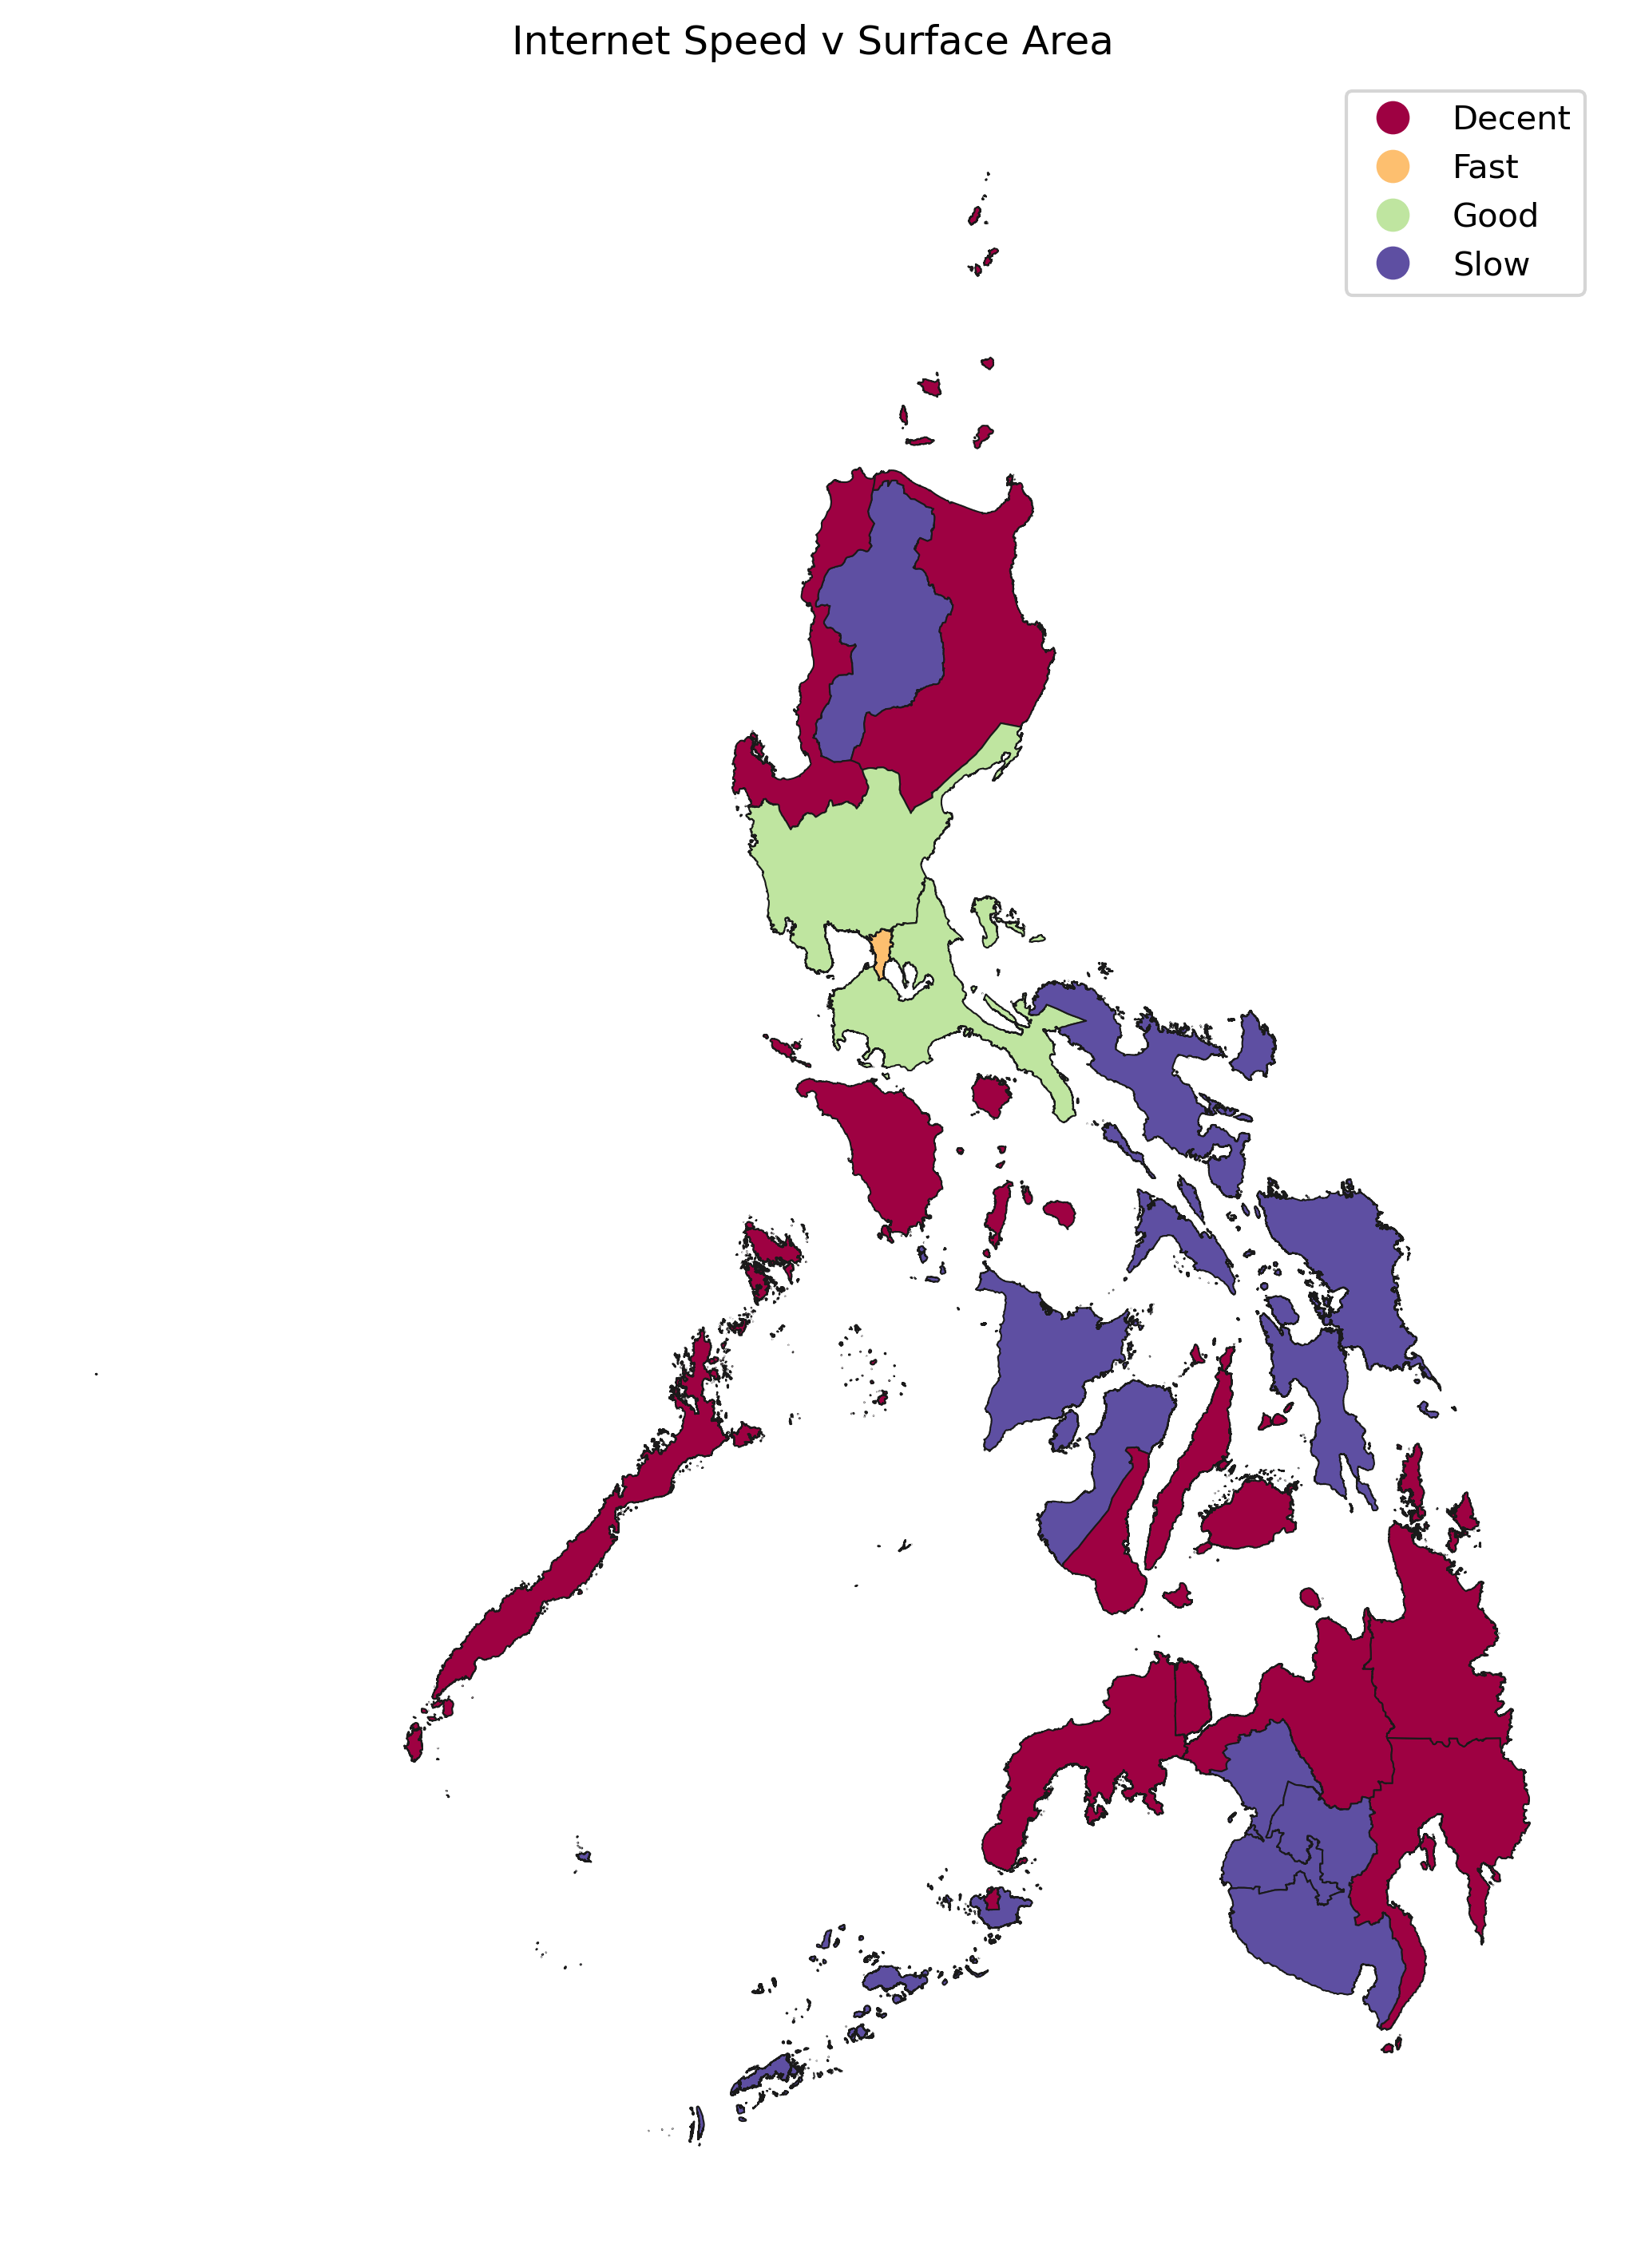

In [29]:
# create figure and axes for Matplotlib and resolution with dpi
fx, ax= plt.subplots(1, figsize=(20, 12),sharex=True, sharey=True, dpi=300)

# create map
merged.plot(column=variable, cmap="Spectral", linewidth=0.5, ax=ax, edgecolor="0.10",legend=True)

#add the title
plt.title('Internet Speed v Surface Area')

#remove the axis
ax.axis("off")

The map shows that the surface area per region does not influence the speed of the internet. Moreover, a large portion of the Philippines still have slow to decent internet speeds. 

# We used dataset of Regional Distribution of Barangays with Cellphone Signal, by Highest Technology Available.

It will be used in discussing our conclusion to show the discrepancy of the available technology per region

Data is taken from 2019 National ICT Survey for with more than 48,000 household correspondents. The goal of this survey is to measure and track the ICT (INFORMATION AND COMMUNICATIONS TECHNOLOGY) development in the country.

In [56]:
m1 = pd.read_excel("2G3G4G.xlsx")
m1

,REGION,No. of Barangays,No. of Households,2G,3G,4G
0,NCR,279,6290,0.0,5.8,94.2
1,CAR,168,2496,12.7,33.6,53.7
2,ARMM,177,2091,42.5,42.5,15.0
3,REGION I,102,1584,5.5,26.4,68.1
4,REGION II,109,1749,8.2,39.2,52.6
5,REGION III,197,3504,1.6,18.1,80.3
6,Region IV-A,123,2225,3.5,24.6,71.9
7,Region IV-B,132,2324,10.6,31.7,57.7
8,REGION V,151,2315,21.9,47.7,30.5
9,REGION VI,190,3011,8.6,24.0,67.4


Visualize the Regional Distribution of Barangays with Cellphone Signal, by Highest Technology Available using stacked bar graph

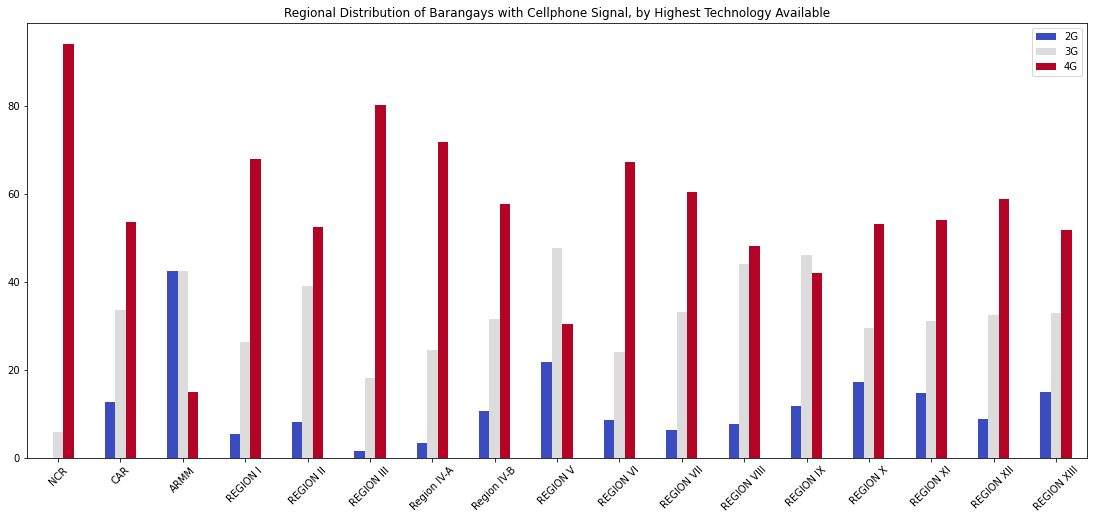

In [165]:
Region=["NCR","CAR","ARMM","REGION I","REGION II","REGION III","Region IV-A","Region IV-B","REGION V","REGION VI","REGION VII","REGION VIII","REGION IX","REGION X","REGION XI","REGION XII","REGION XIII"
]
signal={
    "2G":[0,12.7,42.5,5.5,8.2,1.6,3.5,10.6,21.9,8.6,6.3,7.7,11.8,17.2,14.7,8.8,15.1],
    "3G":[5.8,33.6,42.5,26.4,39.2,18.1,24.6,31.7,47.7,24,33.1,44.1,46.1,29.5,31.2,32.5,33],
    "4G":[94.2,53.7,15,68.1,52.6,80.3,71.9,57.7,30.5,67.4,60.6,48.2,42.1,53.3,54.1,58.8,51.9],
}

df = pd.DataFrame(signal,index=Region)

df.plot(kind="bar",stacked=False,figsize=(19,8),cmap='coolwarm', rot=45)
#plt.legend(bbox_to_anchor=(1.08,1))
plt.title("Regional Distribution of Barangays with Cellphone Signal, by Highest Technology Available")
plt.savefig('signal_barGraph.png', dpi=300)
plt.show()

Almost 60% of interviewed barangays with cellphone signal declare 4G connectivity in their area. 3G is the second highest available technology at 29.6%. However, we can clearly see the discrepancy of the available technology per region. Look at NCR and ARMM, 4G connectivity is most prevalent in NCR while least prevalent in ARMM, and one of the highest percent of regions without telecom service 